In [517]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
import scipy.io as sio
from itertools import filterfalse

In [341]:
feature_mat = sio.loadmat('/Users/aliceqichaowu/Documents/GitHub/2022 summer intern/data/feature_matrix.mat', squeeze_me=True)

In [342]:
feature_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'FR_avg', 'FRc_avg', 'FR_days', 'FRc_days', 'numTrials', 'FR_all', 'FRc_all'])

In [614]:
Num_Trials_day=feature_mat['numTrials']
# Channels=len(FR_days[:,0])
channels=np.arange(0,189)
orig_channels=np.arange(1,193)
remove_channels=[30,39,83]
channels

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Firing rate & Firing rate consistency plots

### Across days

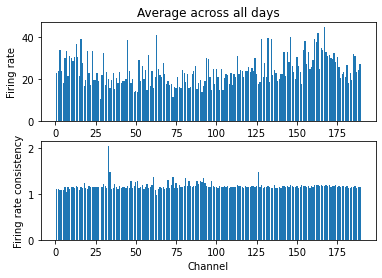

In [344]:
# compare the previous day's firing rate, histogram population, probaility of distribution
FR=feature_mat['FR_days']
FRc=feature_mat['FRc_days']
FR.shape
channel=list(range(1,190))
fig, ax = plt.subplots(2,1)
ax[0].bar(channel,FR)
ax[0].set_ylabel('Firing rate')
ax[1].bar(channel,FRc)
ax[1].set_xlabel('Channel')
ax[1].set_ylabel('Firing rate consistency')
ax[0].set_title('Average across all days')
plt.show()


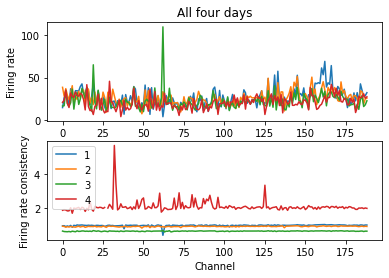

In [345]:
FR_days=feature_mat['FR_avg']
FRc_days=feature_mat['FRc_avg']

fig, ax = plt.subplots(2,1)
for i in range(4):
    ax[0].plot(FR_days[:,i],label=str(i+1))
    ax[1].plot(FRc_days[:,i],label=str(i+1))
    plt.legend()
ax[1].set_xlabel('Channel')
ax[0].set_ylabel('Firing rate')
ax[1].set_ylabel('Firing rate consistency')
ax[0].set_title('All four days')
plt.show()


### Within days

In [479]:
FR_all=feature_mat['FR_all']
FRc_all=feature_mat['FRc_all']
num_win=[]
for i in range(0,4):
    num_temp=FR_all[1,i].shape[0]
    num_win.append(num_temp)
print('number of bins for each channel in 4 days:', str(num_win))    
# FR_win = FR_all[0:Channels,0][0:num_win[0]]
# FRc_win = FRc_all[0:Channels,0][0:num_win[0]]


number of bins for each channel in 4 days: [48, 68, 87, 70]


array([28.88333333, 26.71111111, 30.00555556, 28.51666667, 29.70555556,
       33.54444444, 33.44444444, 31.88888889, 31.51111111, 28.66666667,
       31.52777778, 31.47222222, 32.63888889, 31.02777778, 32.05      ,
       30.51111111, 28.70555556, 30.31111111, 27.88333333, 25.33333333,
       27.97777778, 28.56666667, 29.6       , 28.76666667, 30.37777778,
       30.84444444, 26.05555556, 27.18333333, 29.43888889, 29.44444444,
       28.67222222, 22.66111111, 26.41666667, 24.95555556, 25.95      ,
       27.75555556, 29.16666667, 27.87777778, 24.42777778, 29.55      ,
       30.85555556, 28.53333333, 25.88888889, 26.85      , 22.92777778,
       25.22777778, 19.31666667, 22.49444444, 27.53333333, 20.61111111,
       20.11111111, 24.71666667, 23.07777778, 31.55555556, 29.67777778,
       29.96666667, 28.18888889, 29.95555556, 25.78333333, 29.21111111,
       19.81666667, 34.08888889, 33.39444444, 26.35      , 28.19444444,
       16.63888889, 22.03888889, 35.62222222])

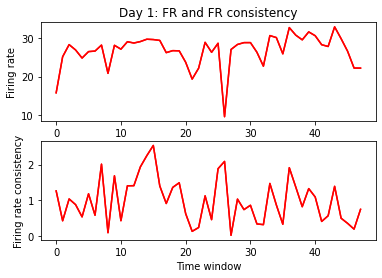

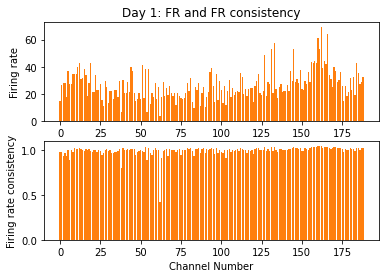

In [440]:
# FR and FRc in Day 1: shown by dividing into windows (n=48)
fr_win=[]
frc_win=[]
for c in range(0,189): 
    for n in range(0,num_win[0]):
        fr_win_temp=FR_all[c,0][n]
        frc_win_temp=FRc_all[c,0][n]
        frc_win.append(frc_win_temp)
        fr_win.append(fr_win_temp)
        
FR_win=np.array(fr_win).reshape((189,48)) 
FRc_win=np.array(frc_win).reshape((189,48)) 
fig, ax = plt.subplots(2,1)
for i in range(0,2):
        ax[0].plot(FR_win.mean(axis=0),color='r')
        ax[1].plot(FRc_win.mean(axis=0),color='r')
ax[1].set_xlabel('Time window')
ax[0].set_ylabel('Firing rate')
ax[1].set_ylabel('Firing rate consistency')
ax[0].set_title('Day 1: FR and FR consistency')
fig, ax = plt.subplots(2,1)
for i in range(0,2):
        ax[0].bar(Channels,FR_win.mean(axis=1))
        ax[1].bar(Channels,FRc_win.mean(axis=1))       
        
ax[1].set_xlabel('Channel Number')
ax[0].set_ylabel('Firing rate')
ax[1].set_ylabel('Firing rate consistency')
ax[0].set_title('Day 1: FR and FR consistency')

plt.show()

In [481]:
FR_win.shape # Day 1: Number of channels x Window 

array([13.7       , 22.18888889, 25.26111111, 23.67777778, 22.01111111,
       21.44444444, 23.4       , 26.        , 18.48888889, 27.22222222,
       24.05555556, 26.27222222, 25.21666667, 26.53888889, 26.3       ,
       27.13888889, 25.09444444, 24.64444444, 23.70555556, 25.47222222,
       22.25      , 18.10555556, 20.38888889, 27.04444444, 26.23333333,
       27.42222222,  9.35555556, 26.55555556, 28.05      , 28.91111111,
       27.6       , 25.61111111, 21.37222222, 29.36111111, 29.64444444,
       26.56666667, 37.86666667, 33.91666667, 34.78333333, 36.34444444,
       34.14444444, 31.06666667, 33.37777778, 38.98888889, 33.65555556,
       30.61111111, 24.47222222, 24.34444444])

In [441]:
df1 = pd.DataFrame({'Firing Rate':FR,'Firing Rate Consistency':FRc} )
df1=df1.replace([np.inf, -np.inf], np.nan)
df1.dropna(inplace=True)
df1.reset_index(drop=True, inplace=True)
# df1

In [349]:
# Check the df dimension and the missing values
print('Dataframe dimension: '+ str(df1.shape) )
print('There are %i nan values in the dataframe' % df1.isna().sum().sum())
np.min(FRc_days)

Dataframe dimension: (188, 2)
There are 0 nan values in the dataframe


0.4228934945262397

## Hypothesis Testing
- Here, I want to test out 1) population level: the mean of FR, FRc from first sample window is true for the next window; 2) channel level: ~each channel's fr from the first window is the same as next window. 
**H0: FR2=FR1 ( sample window 2 mean = sample window 1 population mean);**<br>
**Ha: FR2≠FR1 ( sample window 2 mean ≠ sample window 1 population mean);**

### 1. Histogram plotting

### 1) Population level

In [350]:
## make inf=0
FRc_days[FRc_days==np.inf]=0

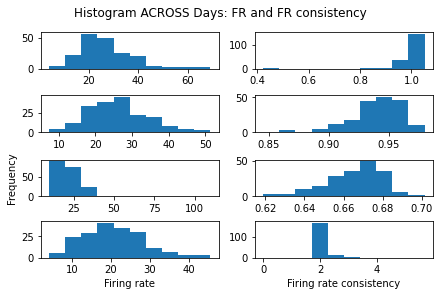

In [444]:
## histogram plot across four days
fig, axs = plt.subplots(4, 2, constrained_layout=True)
for i in range(0,4):
    axs[i,0].hist(FR_days[:,i])
    axs[i,1].hist(FRc_days[:,i])
axs[3,0].set_xlabel('Firing rate')
axs[2,0].set_ylabel('Frequency')
axs[3,1].set_xlabel('Firing rate consistency')
plt.suptitle('Histogram ACROSS Days: FR and FR consistency')
plt.show()

In [432]:
## histogram plot for day 1 (channels 30,39,83 were removed;)
# fig, axs = plt.subplots(6,8,figsize=(8,8))
# # for i in range(0,48):
# for c in range(0,6):
#     for r in range (0,8):
#         axs[c,r].hist(FR_win[:,(c*(r+1))])
# #     axs[i,1].hist(FRc_win[:,i])

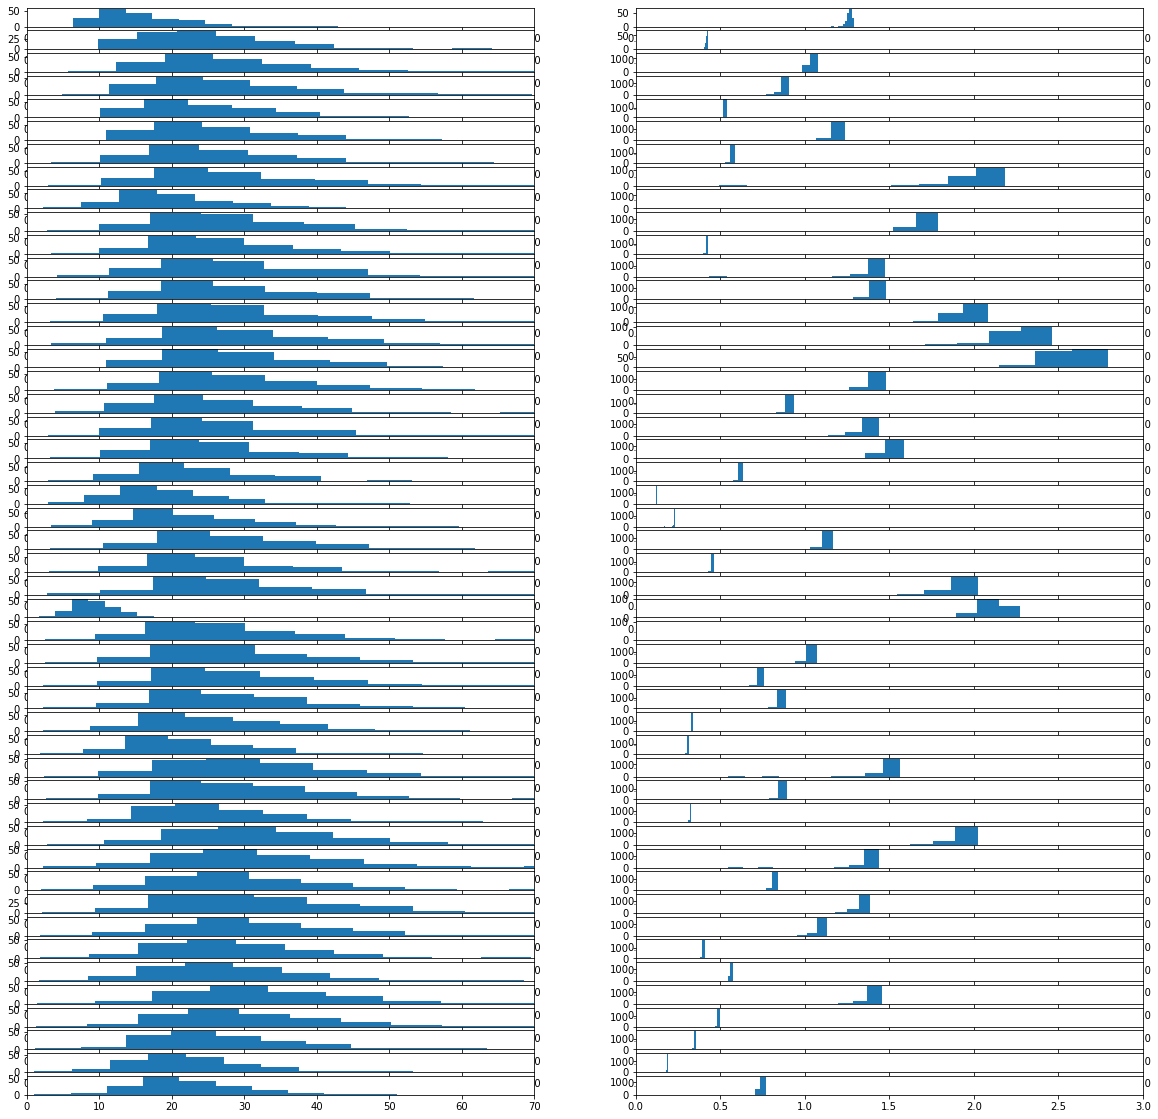

In [506]:
fig, axs = plt.subplots(48,2,figsize=(20,20))
for i in range(0,48):

    axs[i,0].hist(FR_win[:,i])
    axs[i,0].set_xlim(0,70)
    axs[i,1].hist(FRc_win[:,i])
    axs[i,1].set_xlim(0,3)

# axs[19,0].set_xlabel('Firing rate')
# axs[10,0].set_ylabel('Frequency')
# axs[19,0].set_xlabel('Firing rate consistency')
# plt.suptitle('Histogram for Day 1: FR and FR consistency')
plt.show()

### 2) Single-channel level

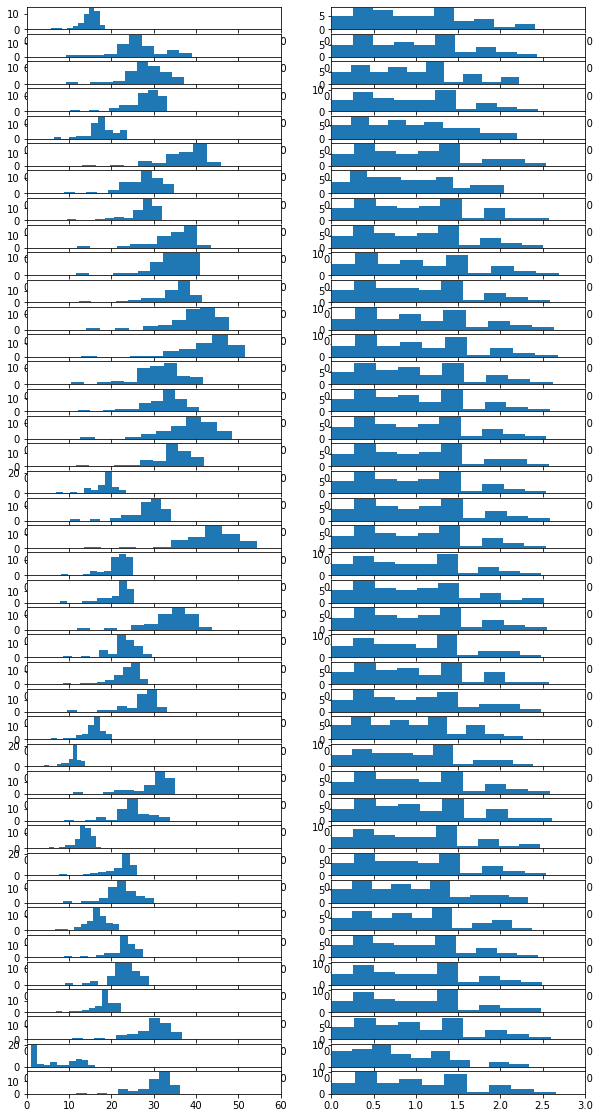

In [522]:
## histogram plot for day 1 across channels (channels 30,39,83 were removed;)
fig, axs = plt.subplots(40,2,figsize=(10,20))

for i in range(0,40):
    axs[i,0].hist(FR_win[i,:])
    axs[i,0].set_xlim(0,60)
    axs[i,1].hist(FRc_win[i,:])
    axs[i,1].set_xlim(0,3)

In [477]:
FR_win[1,1]

22.18888888888889

### 2. Statistical testing

In [442]:
## Find first day condfidence interval of FR and FR consistency
Num_Trials_day
FR_day1=FR_days[:,0]
FRc_day1=FRc_days[:,0]
lower_FR=np.quantile(FR_days[:,0],0.025)
upper_FR=np.quantile(FR_days[:,0],0.975)
FR_ci=(lower_FR,upper_FR)
FRc_ci=(np.quantile(FRc_days[:,0],0.025),np.quantile(FRc_days[:,0],0.975))
print('FR confidence interval is',str(FR_ci))
print('FR consistency confidence interval is',str(FRc_ci))
# np.average(FR_days[:,0])
# np.std(FR_days,axis=0)

FR confidence interval is (10.628402777777778, 53.15942129629629)
FR consistency confidence interval is (0.9097346281421215, 1.0393893327565424)


### Standardize using z-score


In [427]:
zscore_FR = (FR_win-np.mean(FR_win,axis=0))/np.std(FR_win,axis=0)
zscore_FRc = (FRc_win-np.mean(FRc_win,axis=0))/np.std(FRc_win,axis=0)
p_val=1-sts.norm.cdf(zscore_FR, loc=0, scale=1)
p_val

array([[0.89193511, 0.88095422, 0.8833205 , ..., 0.87577644, 0.88410369,
        0.87863054],
       [0.63416637, 0.61894254, 0.60509527, ..., 0.35006891, 0.39788127,
        0.39833573],
       [0.42890066, 0.41160395, 0.48174503, ..., 0.44490055, 0.34196509,
        0.38269353],
       ...,
       [0.56447516, 0.42314896, 0.40876828, ..., 0.37828171, 0.39689534,
        0.51981542],
       [0.45323615, 0.46198091, 0.45592704, ..., 0.3774772 , 0.35925467,
        0.40143309],
       [0.37398549, 0.45678904, 0.43512952, ..., 0.28674299, 0.27208981,
        0.20376315]])

### T-test

In [557]:
## using all channels across days
N=FR_win.shape[1]
DoF=n
alpha=0.01
print('Degrees of freedom: '+str(DoF))

for r in range(1,FR_win.shape[1]):
    t_stats=sts.ttest_1samp(FR_win[:,r], popmean=FR_win[:,1].mean(), alternative='two-sided')
    print('FR: time win '+str(r+1)+' p-value is',t_stats.pvalue<alpha)
    t_stats=sts.ttest_1samp(FRc_win[:,r], popmean=FRc_win[:,1].mean(), alternative='two-sided')
    print('FRc: time win '+str(r+1)+' p-value is',t_stats.pvalue<alpha)


Degrees of freedom: 47
FR: time win 2 p-value is False
FRc: time win 2 p-value is False
FR: time win 3 p-value is True
FRc: time win 3 p-value is True
FR: time win 4 p-value is False
FRc: time win 4 p-value is True
FR: time win 5 p-value is False
FRc: time win 5 p-value is True
FR: time win 6 p-value is False
FRc: time win 6 p-value is True
FR: time win 7 p-value is False
FRc: time win 7 p-value is True
FR: time win 8 p-value is True
FRc: time win 8 p-value is True
FR: time win 9 p-value is True
FRc: time win 9 p-value is True
FR: time win 10 p-value is True
FRc: time win 10 p-value is True
FR: time win 11 p-value is False
FRc: time win 11 p-value is False
FR: time win 12 p-value is True
FRc: time win 12 p-value is True
FR: time win 13 p-value is True
FRc: time win 13 p-value is True
FR: time win 14 p-value is True
FRc: time win 14 p-value is True
FR: time win 15 p-value is True
FRc: time win 15 p-value is True
FR: time win 16 p-value is True
FRc: time win 16 p-value is True
FR: time w

In [600]:
## across channels
N=FR_win.shape[1]
DoF=n
alpha=0.05
sig_bool=[]
print('Degrees of freedom: '+str(DoF))

for r in range(0,FR_win.shape[0]):
    t_stats=sts.ttest_1samp(FR_win[r,11:], popmean=FR_win[r,0:10].mean(), alternative='two-sided')
    sig_bool.append(t_stats.pvalue<alpha)
    print('FR: channel '+str(actual_channels[r])+' p-value is',str(t_stats.pvalue>alpha))
#     t_stats=sts.ttest_1samp(FRc_win[r,11:], popmean=FRc_win[r,0:10].mean(), alternative='two-sided')
#     print('FRc: channel'+str(actual_channels[r])+' p-value is',t_stats.pvalue>alpha)
# actual_channels[sig_bool]


Degrees of freedom: 47
FR: channel 1 p-value is False
FR: channel 2 p-value is False
FR: channel 3 p-value is False
FR: channel 4 p-value is False
FR: channel 5 p-value is False
FR: channel 6 p-value is True
FR: channel 7 p-value is False
FR: channel 8 p-value is True
FR: channel 9 p-value is True
FR: channel 10 p-value is False
FR: channel 11 p-value is False
FR: channel 12 p-value is False
FR: channel 13 p-value is False
FR: channel 14 p-value is False
FR: channel 15 p-value is False
FR: channel 16 p-value is False
FR: channel 17 p-value is False
FR: channel 18 p-value is True
FR: channel 19 p-value is False
FR: channel 20 p-value is False
FR: channel 21 p-value is True
FR: channel 22 p-value is True
FR: channel 23 p-value is False
FR: channel 24 p-value is False
FR: channel 25 p-value is False
FR: channel 26 p-value is True
FR: channel 27 p-value is False
FR: channel 28 p-value is True
FR: channel 29 p-value is True
FR: channel 31 p-value is False
FR: channel 32 p-value is False
FR:

In [611]:
len(sig_bool)
# len(sig_bool)
# print(np.mean(FR_win,axis=0)) #mean FR for each time window across channels
# print(np.mean(FRc_win,axis=0) )
# plt.plot(np.mean(FR_win,axis=0))
# plt.plot(np.mean(FRc_win,axis=0))
# len(actual_channels)x

189

In [642]:
# Classify stable and unstable channels based on p-values
sig_arr=np.array(sig_bool)
remove_channels=[30,39,83]
stable_channels=actual_channels[sig_arr]
unstable_channels=np.setdiff1d(actual_channels,stable_channels)
print('unstable channels '+str(unstable_channels))
print('stable channels '+str(stable_channels))
# print(channels[sig_arr])
# unstable_channels.shape[0]
stable_temp=channels[sig_arr]
unstab_temp=np.setdiff1d(channels,stable_temp)
# unstab_temp

unstable channels [  6   8   9  18  21  22  26  28  29  33  38  45  54  55  56  59  64  66
  68  74  78  82  87  88  89  90  99 100 101 102 107 109 111 114 117 118
 123 129 130 132 144 145 147 149 150 152 153 165 168 177]
stable channels [  1   2   3   4   5   7  10  11  12  13  14  15  16  17  19  20  23  24
  25  27  31  32  34  35  36  37  40  41  42  43  44  46  47  48  49  50
  51  52  53  57  58  60  61  62  63  65  67  69  70  71  72  73  75  76
  77  79  80  81  84  85  86  91  92  93  94  95  96  97  98 103 104 105
 106 108 110 112 113 115 116 119 120 121 122 124 125 126 127 128 131 133
 134 135 136 137 138 139 140 141 142 143 146 148 151 154 155 156 157 158
 159 160 161 162 163 164 166 167 169 170 171 172 173 174 175 176 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192]


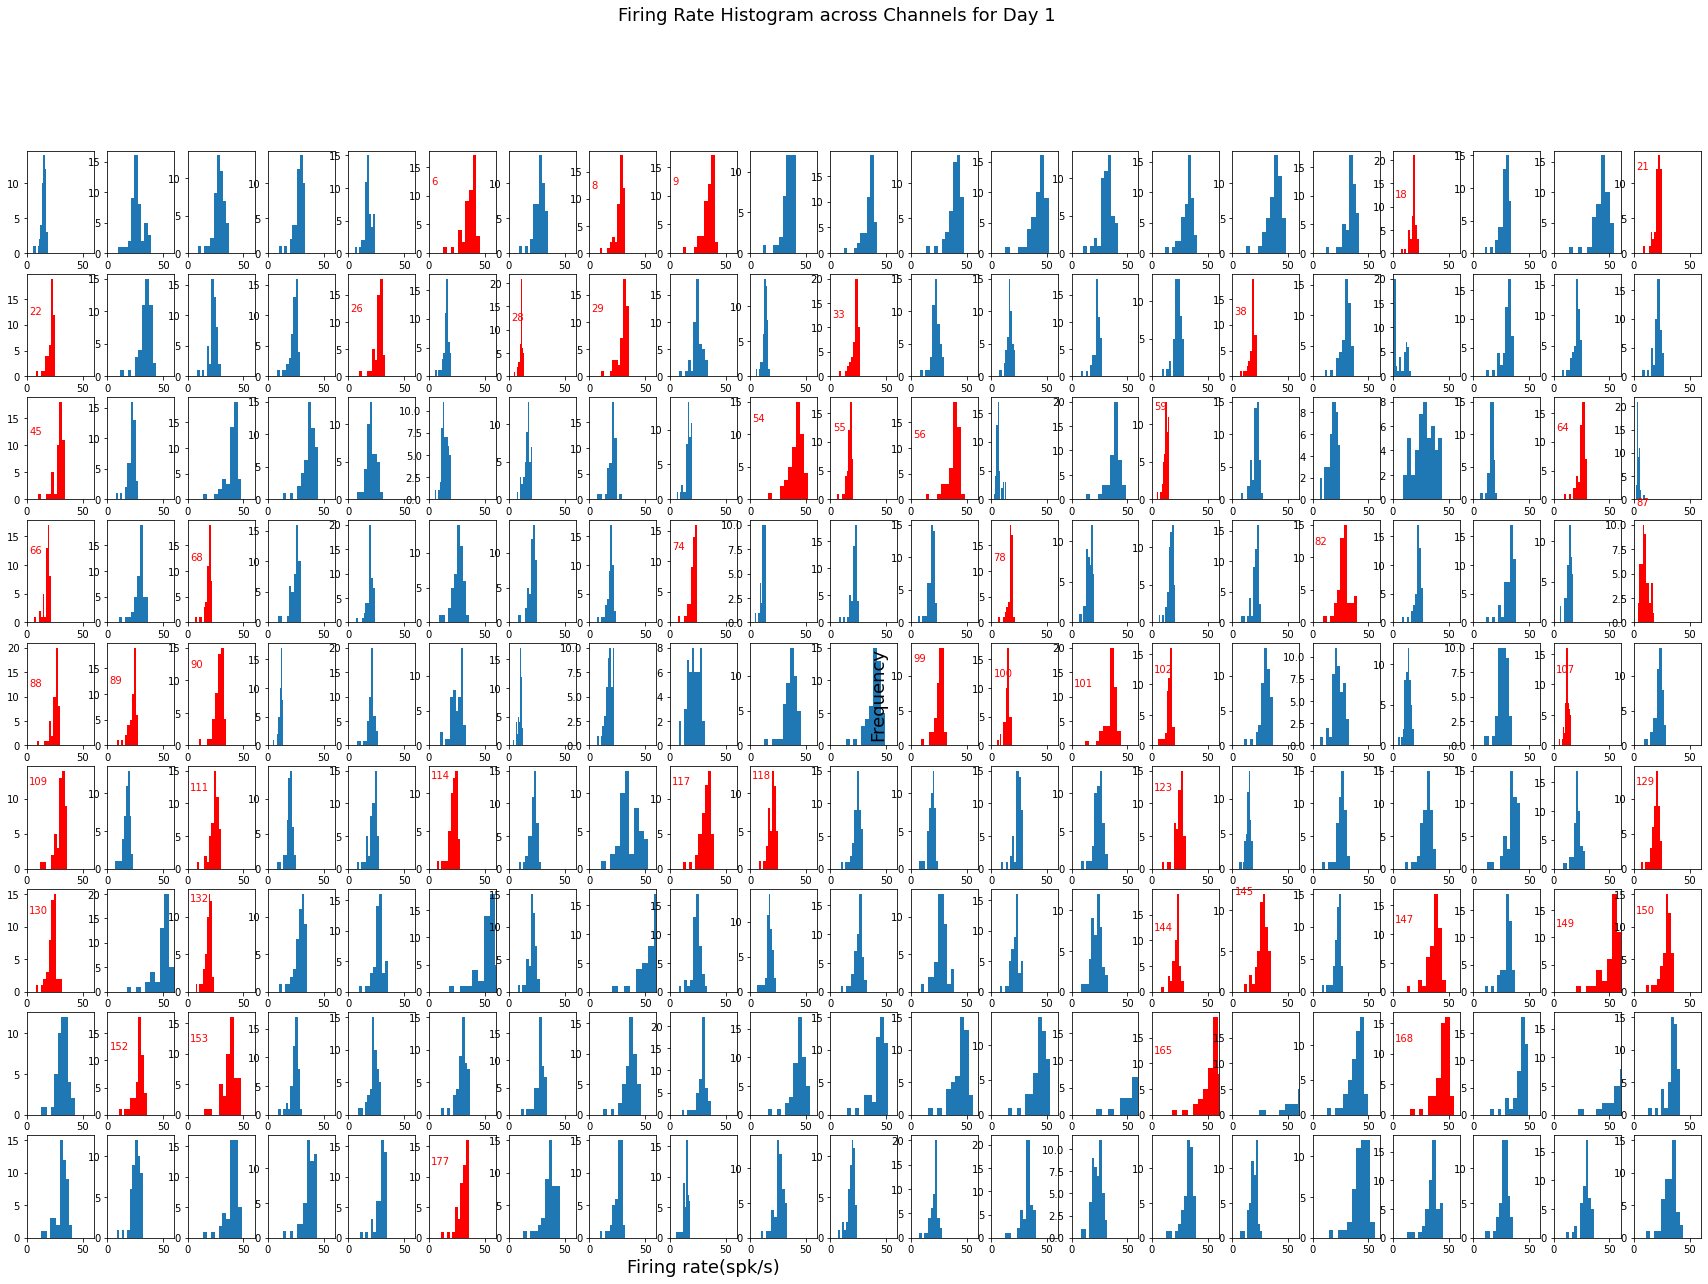

In [644]:
## Visualize unstable channels with histogram plot 
fig, axs = plt.subplots(9,21,figsize=(30,20))
axs = axs.flat
for i in range(0,len(actual_channels)):
    if sig_arr[i]==True:
        axs[i].hist(FR_win[i,:])
        axs[i].set_xlim(0,60)
    else:
        axs[i].hist(FR_win[i,:],color='r')
        axs[i].set_xlim(0,60)
        label=actual_channels[i]
        axs[i].annotate(str(label),xy=(10, 0),xycoords='data',xytext=(2, 12), textcoords='data',color='r')
axs[-13].set_xlabel('Firing rate(spk/s)',fontsize=18)
axs[95].set_ylabel('Frequency',fontsize=18)
plt.suptitle('Firing Rate Histogram across Channels for Day 1',fontsize=18)
plt.show()

In [607]:
len(axs)

21

### PCA

In [241]:
## PCA
pca = PCA()  # by default, if number of PCs is not specified, all PCs are kept
pca.fit(df1)
X_pca = pca.transform(df1)  # principal components
explained_var = pca.explained_variance_ratio_
nPC = list(range(1, PC.shape[1]+1))
# Cumulative explained variance
cum_explained_var = np.cumsum(pca.explained_variance_ratio_)
print(cum_explained_var)

[0.99983272 1.        ]


## Unsupervised learning
## 1. K-means clustering 
Try different number of clusters from 1 to 20 and find the optimal k from the scree plot.

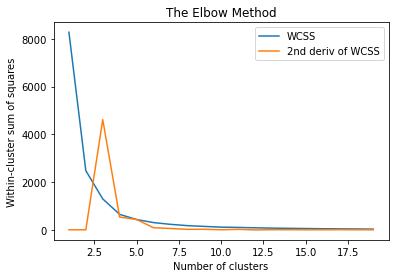

In [242]:
wcss = []
kcluster_list = range(1, 20)
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

diff2 = np.append([0, 0], np.diff(np.diff(wcss))) 

fig, ax = plt.subplots()

plt.plot(range(1, 20), wcss,label='WCSS')
plt.plot(kcluster_list, diff2, label='2nd deriv of WCSS')  
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')


ax.legend()
plt.show()

In [243]:
# Optimal number of clusters
k_opt = kcluster_list[np.argmax(diff2)]
print('Optimal number of clusters:',str(k_opt))

Optimal number of clusters: 3


In [244]:
# K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=k_opt, random_state=0) 
clusters = kmeans.fit(df1)
labels = clusters.labels_  # predicted class (clusters)
centers = clusters.cluster_centers_  # centers of clusters
centers.shape

(3, 2)

In [245]:
# Implement tSNE to visualize the clusters
tsne = manifold.TSNE(random_state=42, n_components=2)
X_tsne = tsne.fit_transform(df1)

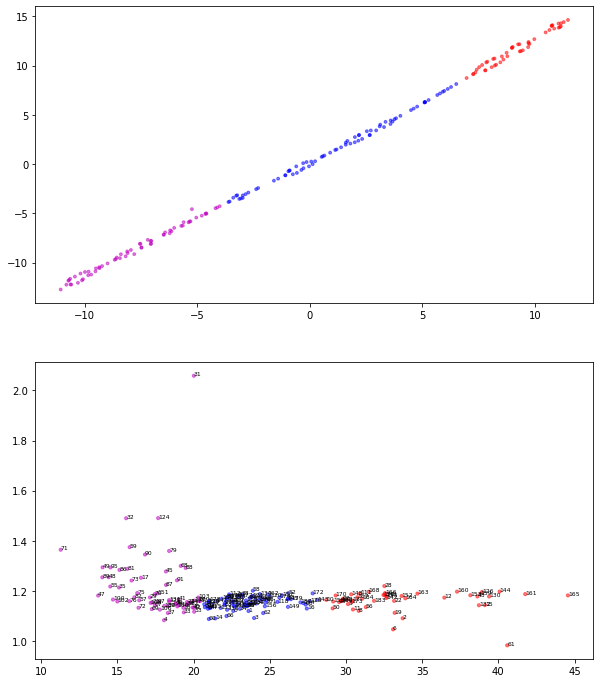

In [246]:
# Plot clusters
df1['labels_Kmeans'] = labels
colors = {0:'b', 1:'m',2:'r'}
method=['tSNE','original']
channel_num=df1.index
x=df1.iloc[:,0]
y=df1.iloc[:,1]

fig,ax = plt.subplots(2,1,figsize=(10, 12))

ax[0].scatter(X_tsne[:,0], X_tsne[:,1],c=df1['labels'].map(colors), alpha=0.5,s=8)
ax[1].scatter(x, y,c=df1['labels'].map(colors),alpha=0.5,s=10)
for i in range(len(channel_num)):
    ax[1].annotate(channel_num[i], (x[i], y[i]),fontsize=6)
plt.show()  
for i in range(0,2):
    ax[i].set_xlabel('PC 1')
    ax[i].set_ylabel('PC 2')
    ax[i].set_title('K means clustering: '+method[i]+' method')

## 2. Agglomerative Clustering

In [268]:
clst1 = AgglomerativeClustering(n_clusters=3,affinity='Euclidean',linkage='complete')
clst1.fit(df1)
labels1 = clst1.labels_  # preicted class (clusters)
df1['labels_Euclidean'] = labels1

clst2 = AgglomerativeClustering(n_clusters=3,affinity='cosine',linkage='complete')
clst2.fit(X_pca)
labels2 = clst2.labels_  # preicted class (clusters)
df1['labels_Cosine'] = labels2

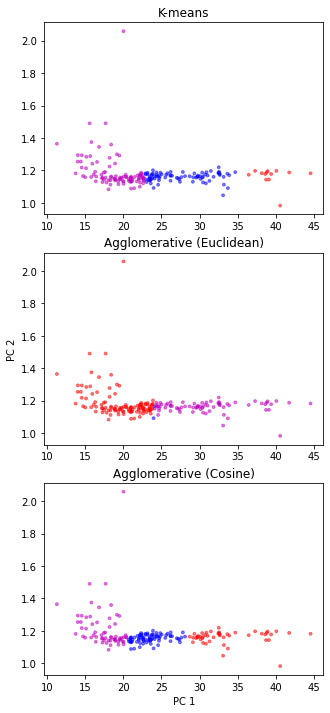

In [285]:
method=['K-means','Agglomerative (Euclidean)','Agglomerative (Cosine)']
colors = {0:'b', 1:'m',2:'r',3:'g'}
fig,ax = plt.subplots(3,1,figsize=(5, 12))
x=df1.iloc[:,0]
y=df1.iloc[:,1]

ax[0].scatter(x,y,c=df1['labels_Euclidean'].map(colors), alpha=0.5,s=8)
ax[1].scatter(x,y,c=df1['labels_Cosine'].map(colors), alpha=0.5,s=8)
ax[2].scatter(x, y,c=df1['labels'].map(colors),alpha=0.5,s=8)
ax[2].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
for i in range(0,3):
    ax[i].set_title(method[i])

In [247]:
df1.groupby(['labels']).mean()

,Firing Rate,Firing Rate Consistency
labels,,
0,23.576726,1.153958
1,17.516110,1.215816
2,33.582019,1.161516


In [259]:
df2=df1.groupby('labels')
df2.get_group(2)

,Firing Rate,Firing Rate Consistency,labels
2,33.717308,1.091352,2
5,30.134956,1.147908,2
6,33.090546,1.047022,2
8,30.834877,1.120888,2
9,30.055302,1.164433,2
10,28.708172,1.164763,2
11,30.459350,1.126362,2
12,36.450439,1.173671,2
13,30.439082,1.161868,2
15,39.113376,1.143771,2


In [319]:
df1.describe()

,Firing Rate,Firing Rate Consistency,labels,labels_Euclidean,labels_Cosine
count,188.000000,188.000000,188.000000,188.000000,188.000000
mean,24.047098,1.176577,0.835106,0.638298,1.590426
std,6.650556,0.088059,0.800696,0.609217,0.514302
min,11.286281,0.983422,0.000000,0.000000,0.000000
25%,19.128951,1.143807,0.000000,0.000000,1.000000
50%,22.789646,1.161809,1.000000,1.000000,2.000000
75%,28.251140,1.182686,1.250000,1.000000,2.000000
max,44.561517,2.058270,2.000000,2.000000,2.000000
